<a href="https://colab.research.google.com/github/imsakshi/Deep-learning-----27th-may/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#we are going to make all the deep learning models using keras.
import tensorflow as tf


In [2]:

print(tf.__version__)

2.2.0


In [3]:
#Lets import MNIST Dataset.
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
#MNIST data set consists of handwritten digit images,there are 60,000 images are in Training set and 10,000 images are in Test set.
(train_images,train_labels) , (test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Images always been stored in numpy arrays.
#4 important attributes of numpy array.
1. .ndim = Tells us the dimension of array.
2. .shape = Tells us the shape of the array.
3.  .size = Total number of elements in the array.
4. .dtype = datatype of the elements of the array

In [5]:
type(train_images)

numpy.ndarray

In [6]:
print(train_images.ndim)

3


In [7]:
print(train_images.shape) #There are 60K images having dimension 28 * 28

(60000, 28, 28)


In [8]:
print(test_images.shape)

(10000, 28, 28)


In [9]:
print(train_labels.shape)

(60000,)


In [10]:
print(train_labels.ndim)

1


In [11]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

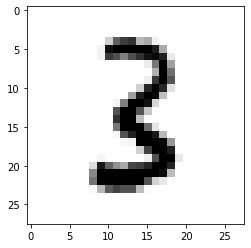

In [12]:
digit = train_images[50000]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [0]:
from tensorflow import keras

The first layer in the network keras.layers.flatten, transforms the frmat of the images from a 2 dim array of (28 * 28) to a one dimensional array of 784 pixels.
After the pixels are flattened, the network consists of a seqyence of two keras.layers.Dense layers. They are densely connected , or fully connected,neural layers. The first Dense layer has 128 nodes(or neurons). The second and last layer returns a array with length 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [17]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
a.ndim

2

In [19]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [0]:
from tensorflow import keras

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Before the model is ready for training, it needs a few more settings. these are added during the model's compile step:
1.Loss function: This measures how accurate the model is during training. we need to minimize this function to "steer" the model in the right direction.
2. Optimizer :  This is how the model is updated based on the data it sees and its loss function.
3.metrics : Used to monitor the training and testing steps. In this code we use accuracy, the fraction of the images that are correctly classified.

---



In [0]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

Train the model.
Training the neural network model requires the following steps:
1. Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set -- in this example, the test_images array.
4. verify that the predictions match the labels from the test_labels array.
Feed the model.
To start training, call model.fit method --- because it "fits" the model to the training data.

In [30]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1783 - accuracy: 0.9556
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1703 - accuracy: 0.9590
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1684 - accuracy: 0.9600
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1703 - accuracy: 0.9600
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1619 - accuracy: 0.9625




```Evaluate the accuracy
# This is formatted as code
```



In [31]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print("\nTest accuracy :" , test_acc)

313/313 - 0s - loss: 0.3584 - accuracy: 0.9426

Test accuracy : 0.9426000118255615


*it turns out to be the accuracy on the test dataset is little less than the training dataset.
The gap between training accuracy and test accuracy represents overfitting.**
Overfitting happens when a machine learning model performs worse on new , previously unseen inputs than it does on training data.
An overfitted model memorizes the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data,

In [0]:
#make predictions
prob_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [0]:
predictions = prob_model.predict(test_images)

In [34]:
predictions[0]

array([3.3882963e-27, 2.3690436e-18, 1.5809919e-25, 5.4261612e-28,
       8.8717417e-26, 3.4513749e-24, 4.5782040e-27, 1.0000000e+00,
       2.1576914e-31, 1.2145158e-19], dtype=float32)

A prediction is an array of 10 numbers. They represents the models "confidence"
that the image corresponds to each of the 10 different digits. you can check which label has the highest confidence value.

In [35]:
import numpy as np
np.argmax(predictions[0])

7

In [36]:
test_labels[0]

7

In [0]:
#As we can see both  prediction and actual outcome comes out to be same, hence my model is working fine.

In [0]:
#There is a dataset named as fashionm mnist.
fashion_mnist = keras.datasets.fashion_mnist

In [38]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
0 - top
1- trouser
2 - pullover
3 - Dress
4 - coat
5- sandal
6 - shirt
7 - sneaker
8 - Bag
9 - Ankle boot

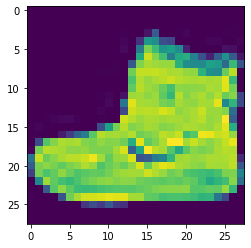

In [39]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

In [0]:
class_names = ["top","Trouser","Pullover","Dress","coat","sandal","shirt","sneaker","bag","ankle boot"]

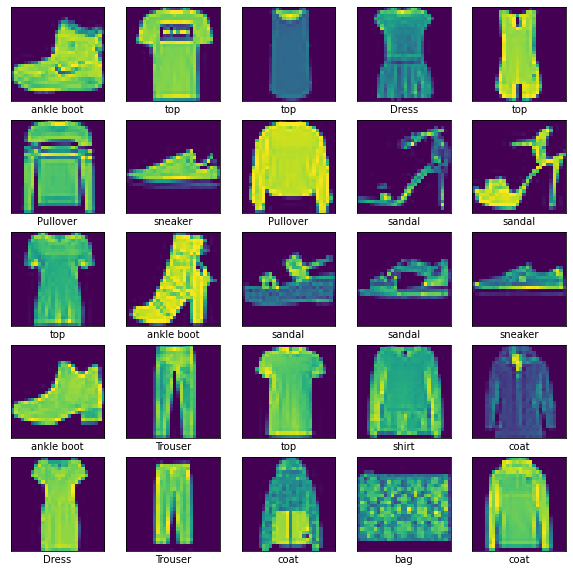

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()